Step 1: Extracting the Dataset

In [1]:
import os
import zipfile
import requests

# URL of the bank marketing dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'

# Path to save the downloaded zip file
zip_file_path = "bank+marketing.zip"

# Download the dataset
response = requests.get(url, stream=True)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)

# Extraction directory
extract_dir = "/content/bank-additional"

# Extract the bank+marketing.zip file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extraction directory to verify
extracted_files = os.listdir(extract_dir)
print("Contents of the extraction directory:")
print(extracted_files)


Contents of the extraction directory:
['bank-additional', '__MACOSX']


Step 2: Loading the Dataset

In [2]:
import pandas as pd

# Specify the path to the CSV file within the extraction directory
csv_file_path = os.path.join(extract_dir, "bank-additional", "bank-additional-full.csv")

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(csv_file_path, sep=';')



In [3]:
# Display the first few rows of the dataset to confirm it loaded correctly
print("\nDataset loaded successfully. Shape:", df.shape)
print(df.head())



Dataset loaded successfully. Shape: (41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons

Step 3: Exploratory Data Analysis (EDA)

3.1 Summary Statistics

In [4]:
def plot_summary_statistics(df):
    print(df.describe(include='all'))

plot_summary_statistics(df)


                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41188     41

3.2 Distribution of Target Variable

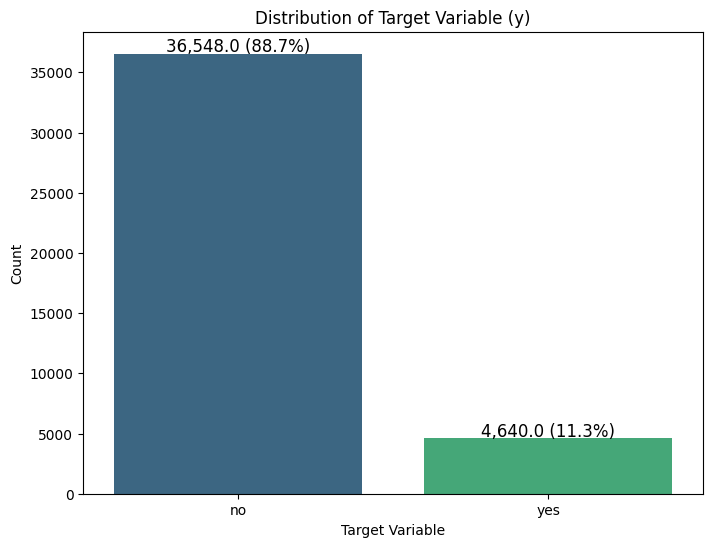

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_target_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='y', data=df, hue='y', palette='viridis', legend=False)

    # Enhancements
    plt.title('Distribution of Target Variable (y)')
    plt.xlabel('Target Variable')
    plt.ylabel('Count')

    # Annotate the bars with counts
    total = len(df)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().annotate(f'{height:,} ({height / total:.1%})',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                           textcoords='offset points')

    plt.show()

plot_target_distribution(df)


3.3 Pairplot of Numerical Features

<Figure size 2400x2000 with 0 Axes>

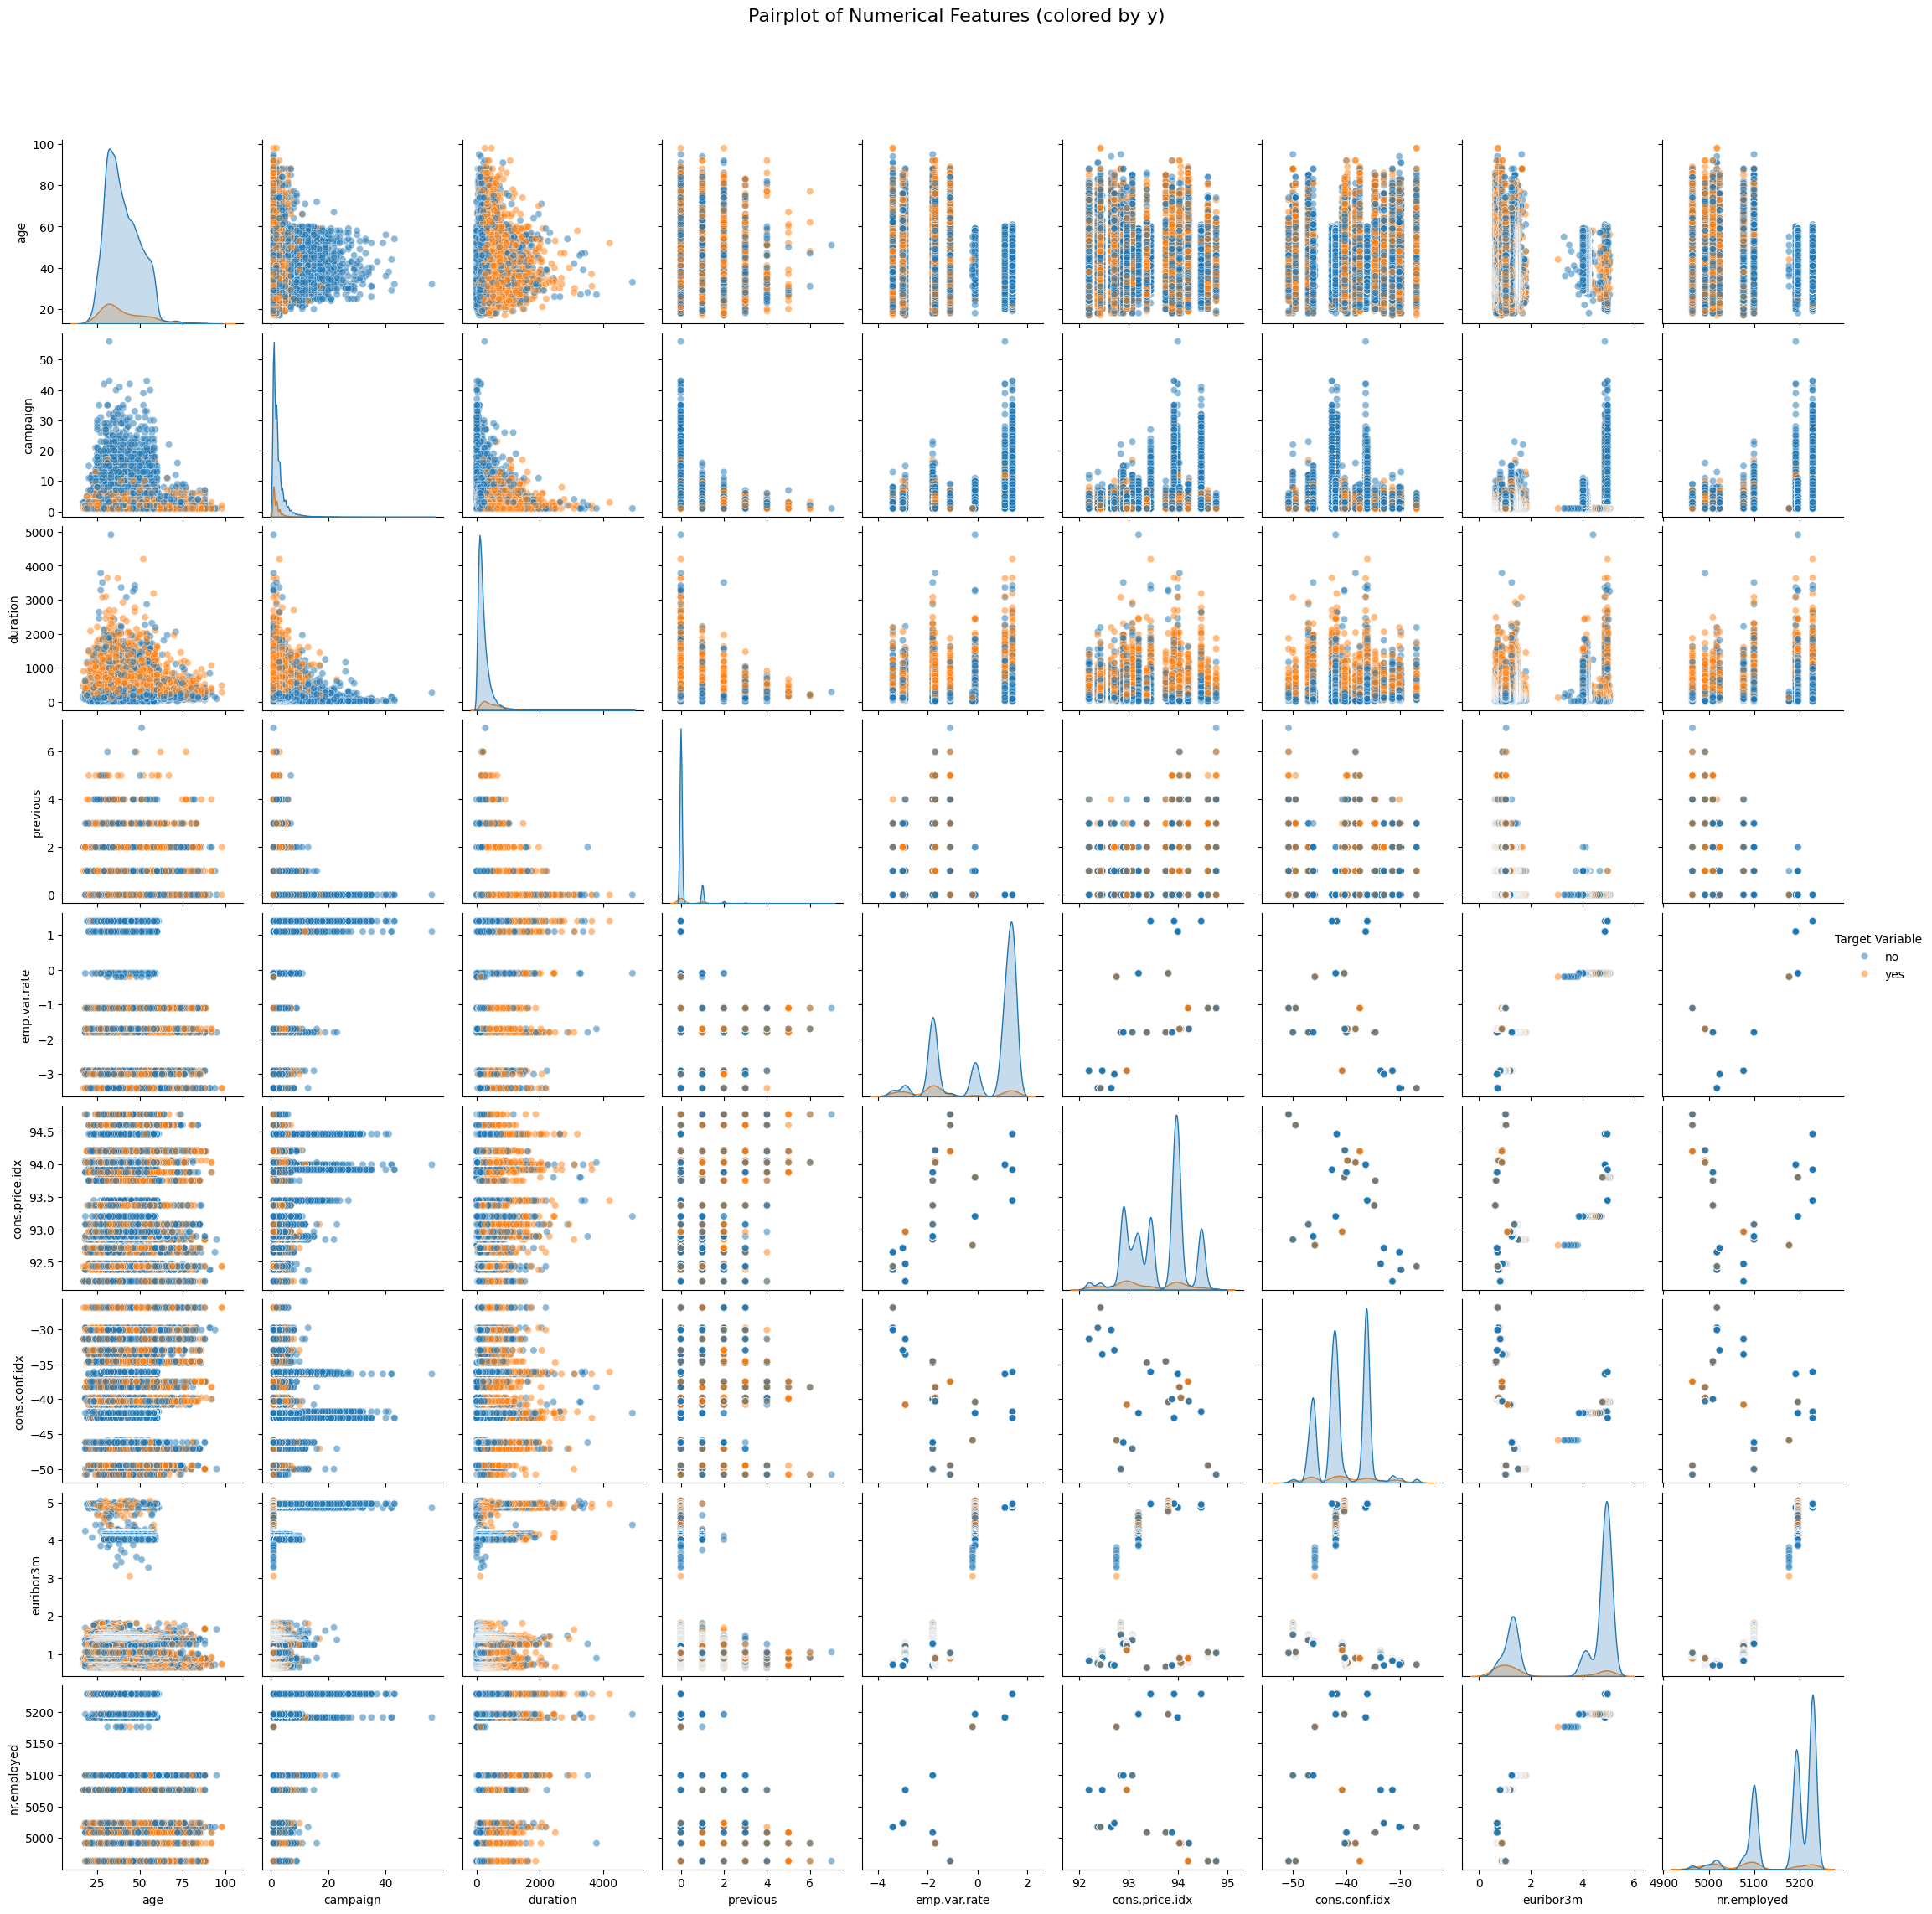

In [6]:
import numpy as np

def plot_pairplot_numerical(df, numerical_features):
    # Set figure size for the entire plot
    plt.figure(figsize=(24, 20))

    custom_palette = {'no': 'tab:blue', 'yes': 'tab:orange'}
    g = sns.pairplot(df, hue='y', vars=numerical_features, palette=custom_palette, plot_kws={'alpha': 0.5}, height=2.5)
    g.fig.suptitle('Pairplot of Numerical Features (colored by y)', y=1.02, fontsize=16)
    plt.subplots_adjust(top=0.95)

    # Adjust transparency for the upper triangle of plots
    for i, j in zip(*np.triu_indices_from(g.axes, 1)):
        g.axes[i, j].set_alpha(0.1)

    # Customize legend title and labels
    g._legend.set_title('Target Variable')
    for t, l in zip(g._legend.texts, ['no', 'yes']):
        t.set_text(l)

    plt.show()

numerical_features = ['age', 'campaign', 'duration', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plot_pairplot_numerical(df, numerical_features)


3.4 Correlation Matrix of Numerical Features

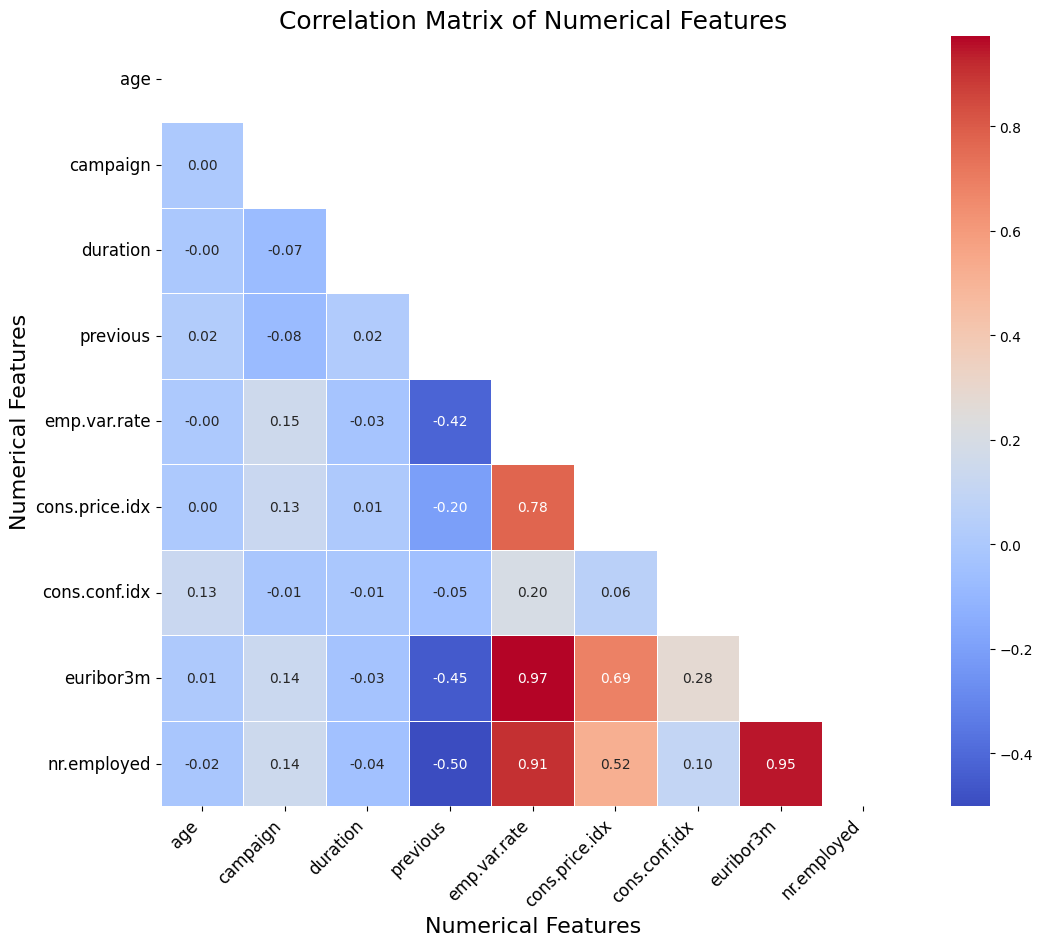

In [7]:
def plot_correlation_matrix(df, numerical_features):
    numerical_df = df[numerical_features]
    corr_matrix = numerical_df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(12, 10))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features', fontsize=18)
    plt.xlabel('Numerical Features', fontsize=16)
    plt.ylabel('Numerical Features', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()

plot_correlation_matrix(df, numerical_features)


3.5 Boxplot of Numerical Features by Target Variable

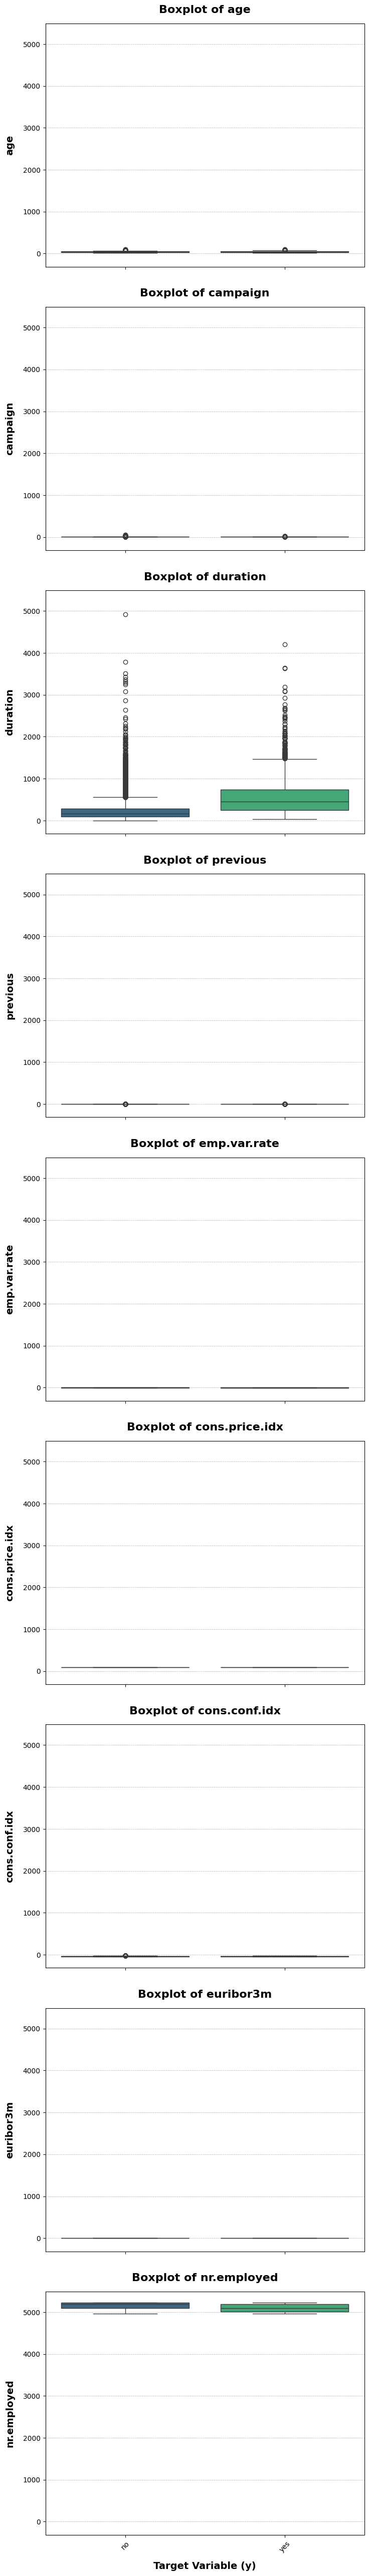

In [8]:
def plot_boxplot_numerical(df, numerical_features):
    num_features = len(numerical_features)
    fig, axes = plt.subplots(num_features, 1, figsize=(8, 6 * num_features), sharex=True, sharey=True)
    custom_palette = sns.color_palette('viridis', n_colors=2)

    for i, col in enumerate(numerical_features):
        sns.boxplot(x='y', y=col, data=df, ax=axes[i], palette=custom_palette, hue='y', dodge=False)

        # Set title with adjusted spacing and font properties
        axes[i].set_title(f'Boxplot of {col}', fontsize=16, fontweight='bold', pad=15)

        # Set labels with adjusted font properties and padding
        axes[i].set_xlabel('Target Variable (y)', fontsize=14, fontweight='bold', labelpad=12)
        axes[i].set_ylabel(f'{col}', fontsize=14, fontweight='bold', labelpad=12)

        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', labelrotation=45)

        # Add grid lines with adjusted line style and width
        axes[i].grid(True, axis='y', linestyle='--', linewidth=0.5)

        # Customize boxplot elements
        for box in axes[i].artists:
            box.set_facecolor('#eaf2f6')

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.95)

    plt.show()

numerical_features = ['age', 'campaign', 'duration', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plot_boxplot_numerical(df, numerical_features)


3.6 Countplot for Categorical Features with Hue by Target Variable

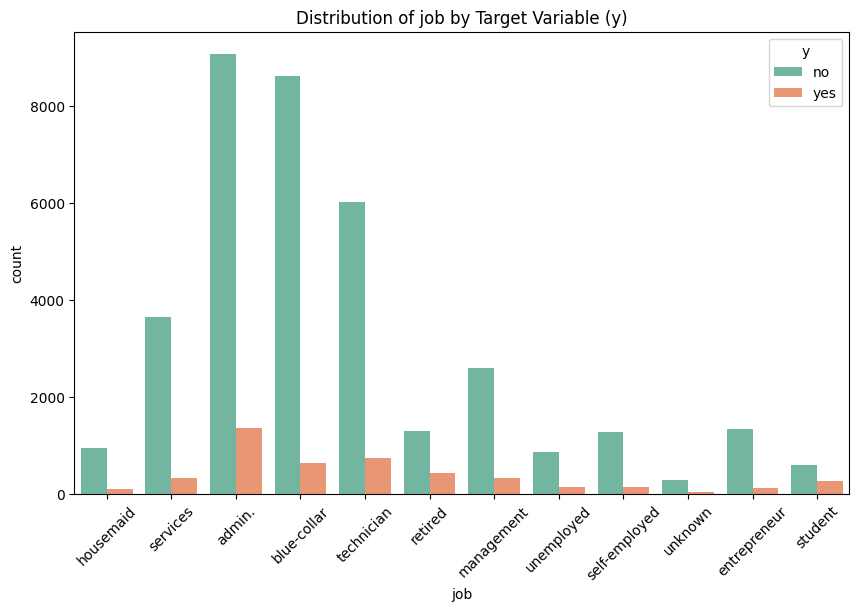

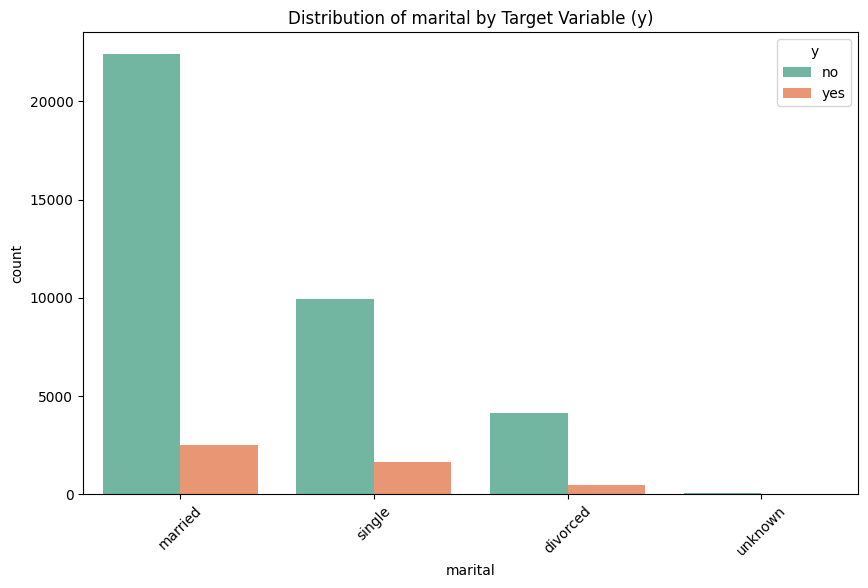

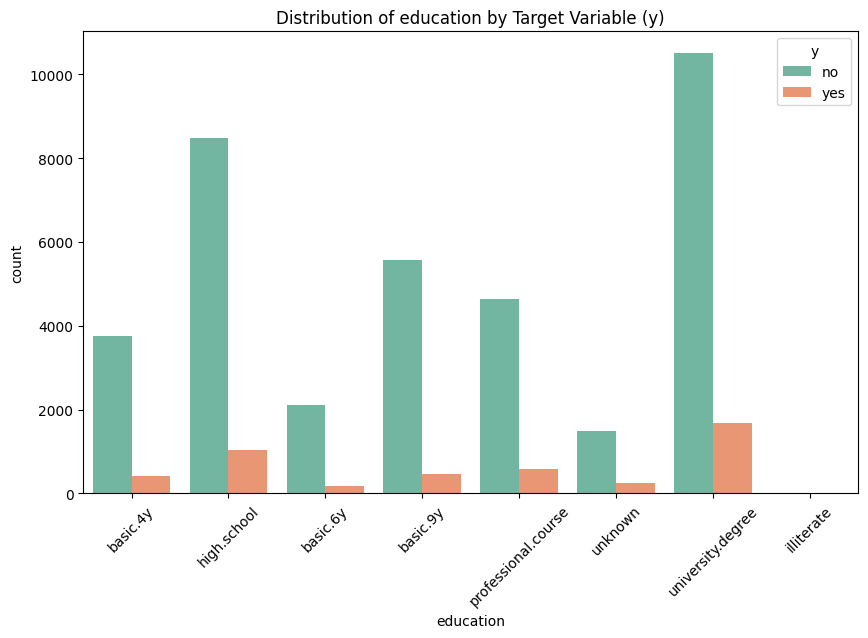

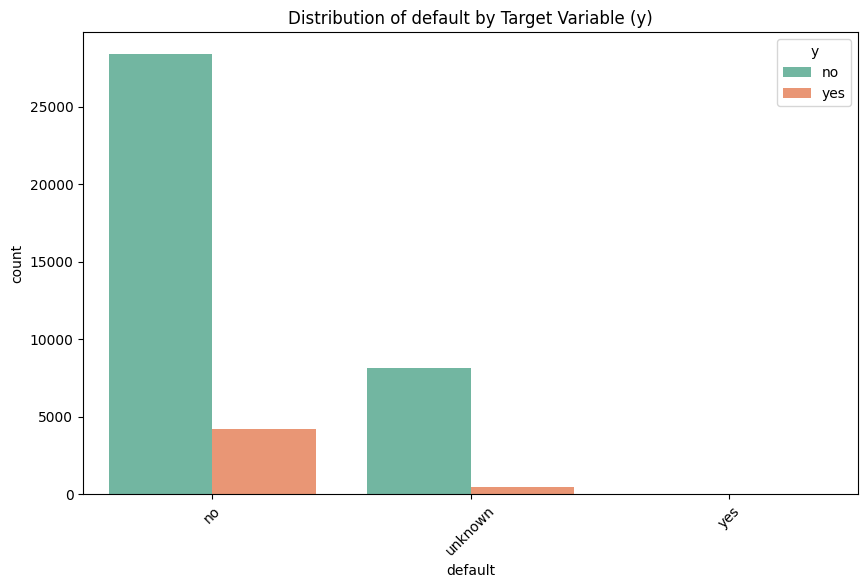

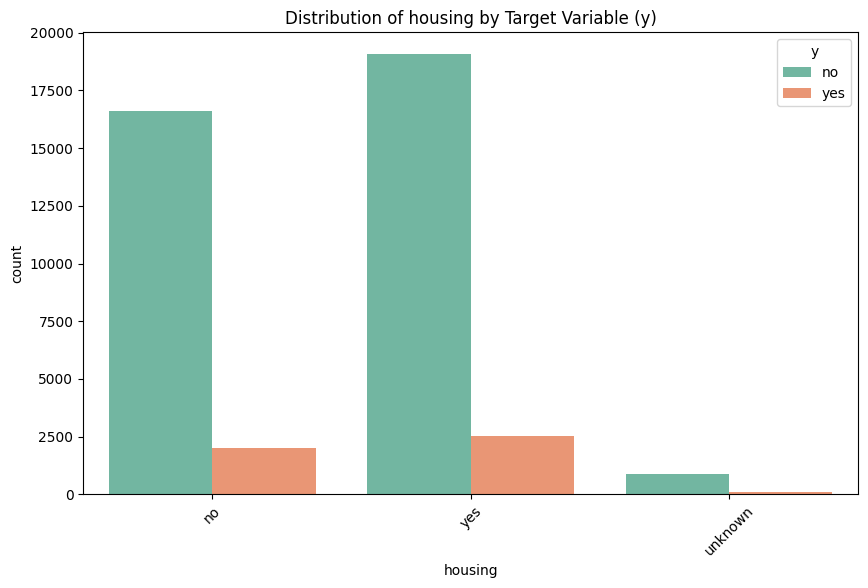

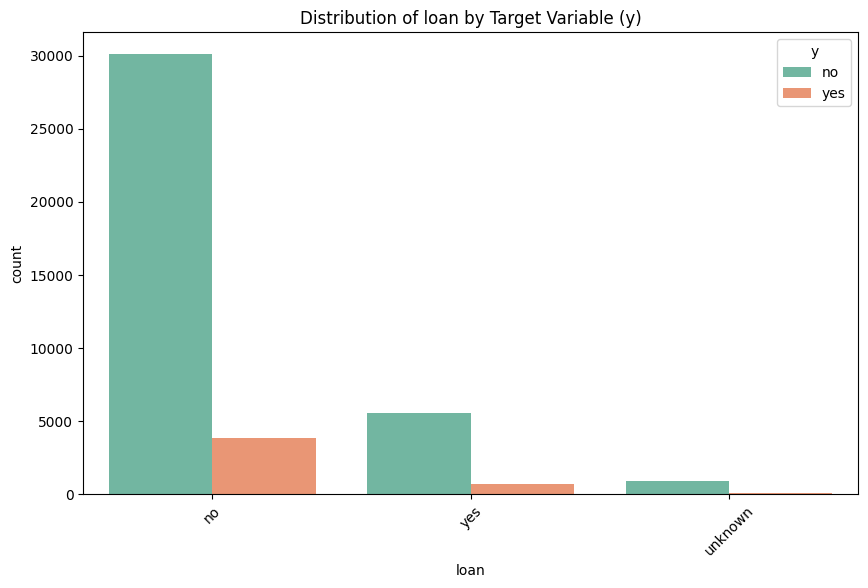

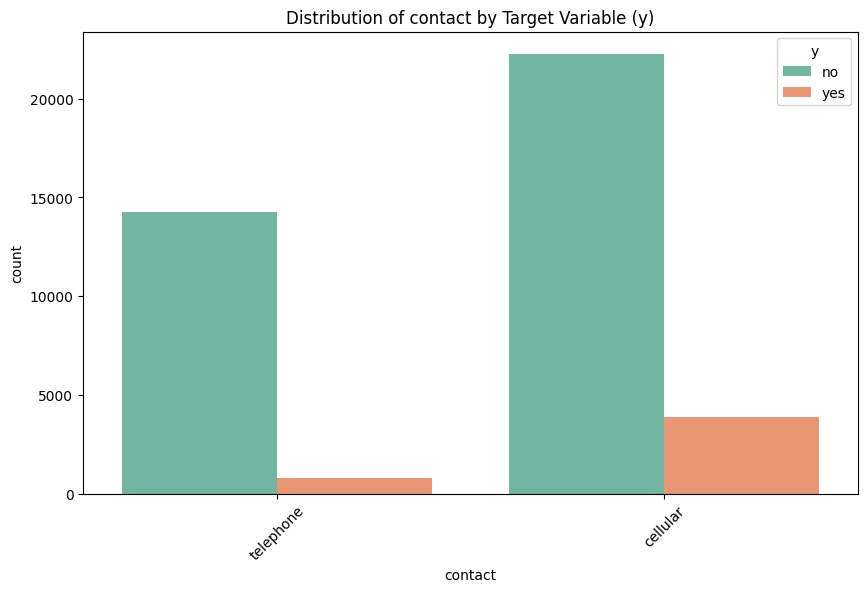

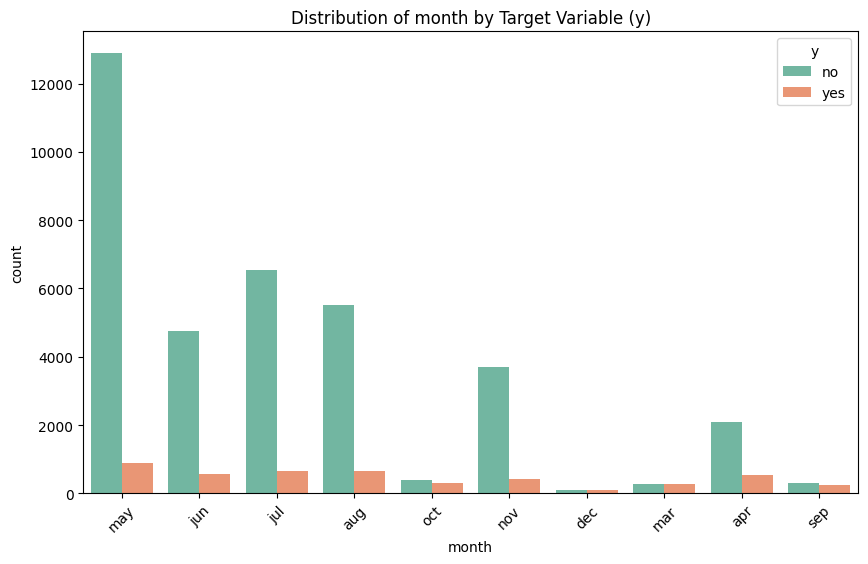

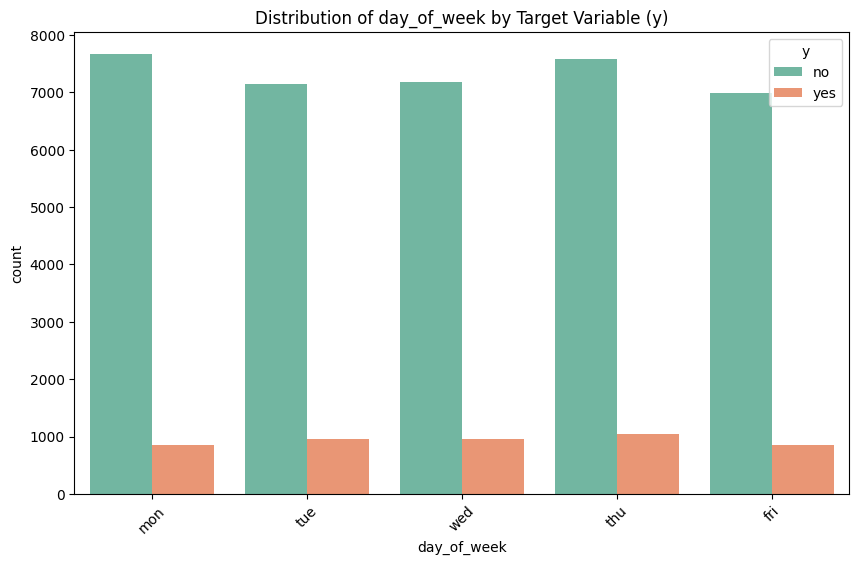

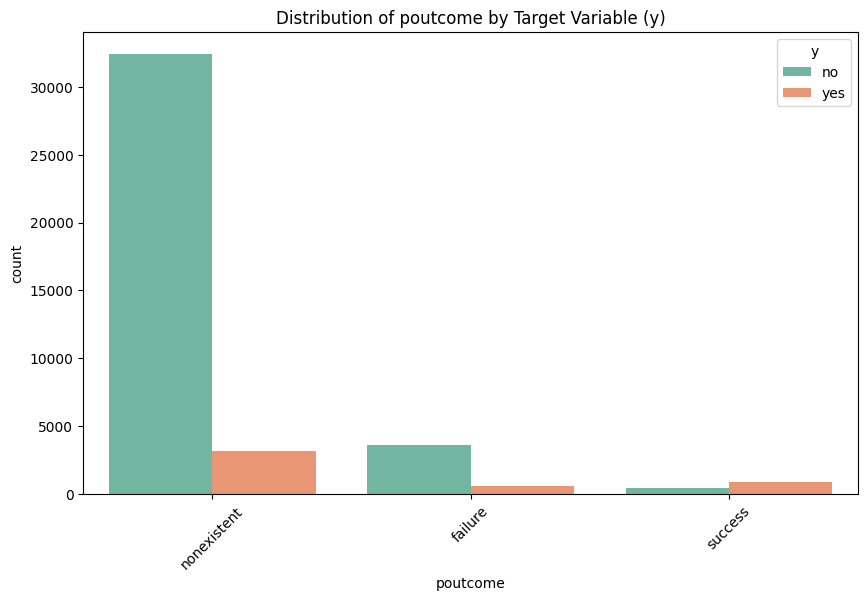

In [9]:
def plot_countplot_categorical(df, categorical_features):
    for col in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='y', data=df, palette='Set2')
        plt.title(f'Distribution of {col} by Target Variable (y)')
        plt.xticks(rotation=45)
        plt.legend(title='y', loc='upper right')
        plt.show()

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
plot_countplot_categorical(df, categorical_features)


Step 4: Preprocessing the Data

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

def preprocess_data(df):
    # Define numerical and categorical features
    numerical_features = ['age', 'campaign', 'duration']
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

    # Preprocessing pipelines
    numerical_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Use handle_unknown='ignore' to handle new categories in test data
    categorical_pipeline = Pipeline(steps=[
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

    # ColumnTransformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features),
            ('cat', categorical_pipeline, categorical_features)
        ]
    )

    # Apply transformations
    X_processed = preprocessor.fit_transform(df.drop(columns=['y']))

    # Debugging: Verify the shape of the transformed data
    print("Shape of transformed data:", X_processed.shape)

    # Get feature names
    numerical_names = numerical_features
    categorical_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

    # Debugging: Verify the number of feature names
    print("Number of numerical feature names:", len(numerical_names))
    print("Number of categorical feature names:", len(categorical_names))

    # Create a DataFrame with the transformed data
    # Convert X_processed to a dense array if it's sparse
    if hasattr(X_processed, 'toarray'):
        X_processed = X_processed.toarray()
    df_transformed = pd.DataFrame(X_processed, columns=numerical_names + list(categorical_names))

    # Append target variable
    df_transformed['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0).values

    return df_transformed

# Preprocess the data
df_processed = preprocess_data(df)

Shape of transformed data: (41188, 46)
Number of numerical feature names: 3
Number of categorical feature names: 43


Step 5: Splitting Data into Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = df_processed.drop(columns=['y'])
y = df_processed['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Step 6: Handling Class Imbalance with SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

def handle_imbalance(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

# Handle class imbalance
X_resampled, y_resampled = handle_imbalance(X_train, y_train)


ModuleNotFoundError: No module named 'imblearn'

Step 7: Training a Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_resampled, y_resampled)


Step 8: Cross-Validating the Model

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

def cross_validate_model(clf, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {'accuracy': 'accuracy',
               'precision': 'precision',
               'recall': 'recall',
               'f1_score': 'f1',
               'roc_auc': 'roc_auc',
               'average_precision': 'average_precision'}

    cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring)
    return cv_results

# Cross-validate the Decision Tree classifier
cv_results_dt = cross_validate_model(clf_dt, X_resampled, y_resampled)

# Print cross-validation results for Decision Tree
print("Decision Tree Classifier:")
print(f"Mean Accuracy: {cv_results_dt['test_accuracy'].mean():.2f}")
print(f"Mean Precision: {cv_results_dt['test_precision'].mean():.2f}")
print(f"Mean Recall: {cv_results_dt['test_recall'].mean():.2f}")
print(f"Mean F1-score: {cv_results_dt['test_f1_score'].mean():.2f}")
print(f"Mean ROC AUC: {cv_results_dt['test_roc_auc'].mean():.2f}")
print(f"Mean Average Precision: {cv_results_dt['test_average_precision'].mean():.2f}")
print()


In [ ]:
# Function to plot cross-validation scores
def plot_cv_scores(cv_results):
    metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'test_roc_auc', 'test_average_precision']
    metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC', 'Average Precision']

    # Check if all metrics are present in cv_results
    if not all(metric in cv_results for metric in metrics):
        raise ValueError("Not all required metrics are present in cv_results.")

    # Extract mean scores for each metric
    mean_scores = [cv_results[metric].mean() for metric in metrics]

    # Define colors for bars
    colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'orchid', 'lightcoral']

    # Create figure and axis with adjusted figure size
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.bar(metric_labels, mean_scores, color=colors)

    # Add labels, title, and grid
    ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title('Cross-validation Scores', fontsize=14, fontweight='bold')
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

    # Annotate bars with values
    for bar, score in zip(bars, mean_scores):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    # Rotate x-axis labels and adjust spacing
    ax.set_xticks(np.arange(len(metric_labels)))
    ax.set_xticklabels(metric_labels, rotation=45, ha='right', fontsize=10)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Customize legend with metrics and colors
    legend_labels = [f'{metric}: {mean_score:.2f}' for metric, mean_score in zip(metric_labels, mean_scores)]

    # Move the legend to a specific location outside the plot
    ax.legend(bars, legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10)

    plt.show()

# Example usage:
plot_cv_scores(cv_results_dt)


Step 9: Evaluating the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the Decision Tree classifier
y_pred = clf_dt.predict(X_test)
report_dt = classification_report(y_test, y_pred)
matrix_dt = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Decision Tree Classifier - Test Set Performance:")
print(report_dt)
print(matrix_dt)
print()



In [ ]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_dt, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


Step 10: Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_hyperparameters(clf, X, y):
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'criterion': ['gini', 'entropy']
    }

    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X, y)

    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    return best_clf, best_params

# Tune hyperparameters of the Decision Tree
best_clf_dt, best_params_dt = tune_hyperparameters(clf_dt, X_resampled, y_resampled)

# Print best parameters and the best estimator
print("Best Parameters:", best_params_dt)
print("Best Estimator:", best_clf_dt)
print()


Step 11: Visualizing the Decision Tree

In [ ]:
from sklearn import tree

def visualize_decision_tree(clf, feature_names):
    plt.figure(figsize=(25, 15))
    tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=['no', 'yes'],
                   rounded=True, fontsize=14, proportion=True, precision=2)
    plt.title("Decision Tree Visualization", fontsize=20)
    plt.show()

# Visualize the Decision Tree
visualize_decision_tree(best_clf_dt, X_train.columns)